## Project 3: Cleaning Data
Author: Neha Tiwari

**1. Import Libraries and Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")  # Load the dataset
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**2. Initial Data Exploration**

In [2]:
# Check data types and non-null counts
df.info()

# Summary statistics
df.describe()

# Check column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**3. Identify Missing Values**

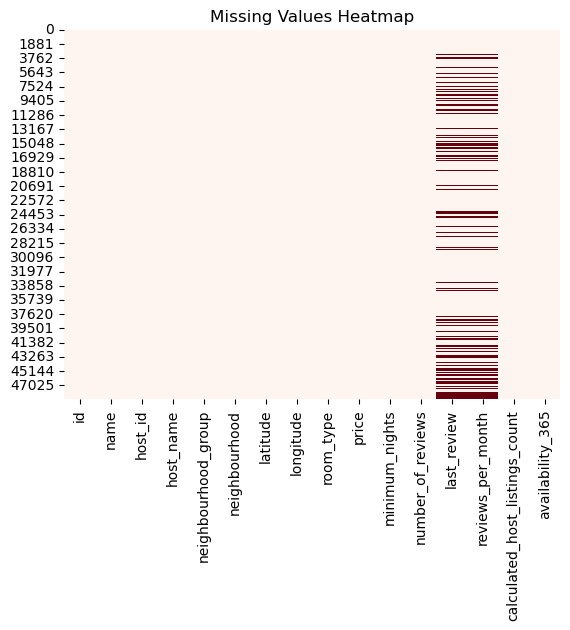

In [3]:
# Count missing values per column
df.isnull().sum()

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()


**4. Handle Missing Values**

In [5]:
# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


**5. Remove Duplicates**

In [6]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()


**6. Standardize Formats**

In [16]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Lowercase string columns (like 'room_type', 'host_name', etc.)
df['room_type'] = df['room_type'].str.lower()
df['host_name'] = df['host_name'].str.lower()




**6. Detect Outliers in Price**


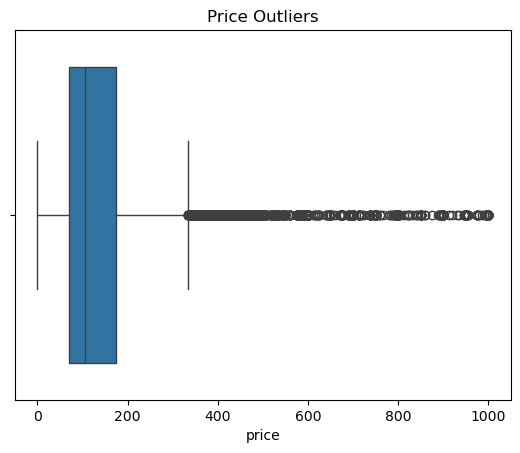

In [13]:
# Boxplot for price
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

# Remove extreme outliers (e.g., price > $1000)
df = df[df['price'] <= 1000].copy()


**7. Convert and Validate Data Types**

In [14]:
# Convert 'last_review' to datetime again if needed
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Ensure numeric types
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')


**8. Save Cleaned Data**

In [15]:
# Final shape
print("Final dataset shape:", df.shape)

# Save cleaned dataset
df.to_csv("cleaned_airbnb_data.csv", index=False)


Final dataset shape: (48656, 16)


## 📌 Data Cleaning Summary & Insights

- ✅ Removed **duplicate entries** to ensure data integrity and prevent double-counting.
- ✅ Handled missing values:
  - Filled `reviews_per_month` with **0** where review data was missing, assuming no reviews.
  - Converted `last_review` to datetime format and left missing values as `NaT`.
- ✅ Standardized text columns (e.g., `room_type`, `host_name`) to **lowercase** for consistency.
- ✅ Dropped extreme price outliers (listings with `price > 1000`) to reduce skewness in analysis.
- ✅ Renamed column headers to **snake_case** for better code readability.
- ✅ Ensured correct data types for numerical and date fields using `pd.to_numeric()` and `pd.to_datetime()`.

### 🧠 Ready for Analysis!
The dataset is now:
- Cleaned and consistent
- Free from critical missing or incorrect values
- Well-structured for Exploratory Data Analysis (EDA) and Visualization
